## Homework CUDA

Made by Marina Grigoreva, Stefano Amalberti, Sofie Othilie Dregi

In [2]:
!uname -a && cat /etc/*release

Linux 1edabe701dfd 6.1.85+ #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024 x86_64 x86_64 x86_64 GNU/Linux
DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=22.04
DISTRIB_CODENAME=jammy
DISTRIB_DESCRIPTION="Ubuntu 22.04.3 LTS"
PRETTY_NAME="Ubuntu 22.04.3 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.3 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy


In [3]:
!pwd
!ls -la

/content
total 84
drwxr-xr-x 1 root root  4096 Nov 24 19:42 .
drwxr-xr-x 1 root root  4096 Nov 24 19:40 ..
drwxr-xr-x 4 root root  4096 Nov 21 14:25 .config
-rw-r--r-- 1 root root 14262 Nov 24 19:42 devicequery.cu
-rw-r--r-- 1 root root  5986 Nov 24 19:42 heat.cu
-rw-r--r-- 1 root root 27832 Nov 24 19:42 helper_cuda.h
-rw-r--r-- 1 root root 14875 Nov 24 19:42 helper_string.h
drwxr-xr-x 1 root root  4096 Nov 21 14:25 sample_data


In [4]:
!nvidia-smi

Sun Nov 24 19:44:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [6]:
!nvcc -o heat heat.cu

In [62]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 5000 5000
Enter number of timesteps: 400
Enter number of threads per block (e.g., 16): 16
==30872== NVPROF is profiling process 30872, command: ./heat
CPU Execution Time: 108.491676 seconds
GPU Execution Time: 0.433936 seconds
The Max Error of 0.00002 is within acceptable bounds.
Grid: 5000x5000, Timesteps: 400, Threads: 16
CPU Time: 108.491676 seconds
GPU Time: 0.433936 seconds
Speedup: 250.02x
Max Error: 0.000015
Speedup: 250.02x
==30872== Profiling application: ./heat
==30872== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   86.85%  427.91ms       400  1.0698ms  907.34us  1.2805ms  step_kernel_mod(int, int, float, float*, float*)
                    8.44%  41.596ms         2  20.798ms  20.408ms  21.188ms  [CUDA memcpy HtoD]
                    4.71%  23.215ms         1  23.215ms  23.215ms  23.215ms  [CUDA memcpy DtoH]
      API calls:   63.41%  430.18ms       400  1.0755ms  911.30u

### Let's now experiment with different numbers

In [63]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 4500 4500
Enter number of timesteps: 400
Enter number of threads per block (e.g., 16): 16
==31377== NVPROF is profiling process 31377, command: ./heat
CPU Execution Time: 87.950369 seconds
GPU Execution Time: 0.394844 seconds
The Max Error of 0.00002 is within acceptable bounds.
Grid: 4500x4500, Timesteps: 400, Threads: 16
CPU Time: 87.950369 seconds
GPU Time: 0.394844 seconds
Speedup: 222.75x
Max Error: 0.000015
Speedup: 222.75x
==31377== Profiling application: ./heat
==31377== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   88.13%  388.78ms       400  971.95us  833.74us  1.0845ms  step_kernel_mod(int, int, float, float*, float*)
                    7.67%  33.831ms         2  16.915ms  16.736ms  17.095ms  [CUDA memcpy HtoD]
                    4.20%  18.529ms         1  18.529ms  18.529ms  18.529ms  [CUDA memcpy DtoH]
      API calls:   61.94%  391.39ms       400  978.48us  837.32us 

In [64]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 4000 4000
Enter number of timesteps: 400
Enter number of threads per block (e.g., 16): 16
==33686== NVPROF is profiling process 33686, command: ./heat
CPU Execution Time: 70.416014 seconds
GPU Execution Time: 0.313870 seconds
The Max Error of 0.00002 is within acceptable bounds.
Grid: 4000x4000, Timesteps: 400, Threads: 16
CPU Time: 70.416014 seconds
GPU Time: 0.313870 seconds
Speedup: 224.35x
Max Error: 0.000015
Speedup: 224.35x
==33686== Profiling application: ./heat
==33686== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   87.90%  308.80ms       400  772.00us  608.37us  834.09us  step_kernel_mod(int, int, float, float*, float*)
                    7.47%  26.233ms         2  13.116ms  13.100ms  13.133ms  [CUDA memcpy HtoD]
                    4.64%  16.287ms         1  16.287ms  16.287ms  16.287ms  [CUDA memcpy DtoH]
      API calls:   57.45%  310.61ms       400  776.52us  611.58us 

In [65]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 3500 3500
Enter number of timesteps: 400
Enter number of threads per block (e.g., 16): 16
==34449== NVPROF is profiling process 34449, command: ./heat
CPU Execution Time: 52.770653 seconds
GPU Execution Time: 0.266151 seconds
The Max Error of 0.00002 is within acceptable bounds.
Grid: 3500x3500, Timesteps: 400, Threads: 16
CPU Time: 52.770653 seconds
GPU Time: 0.266151 seconds
Speedup: 198.27x
Max Error: 0.000015
Speedup: 198.27x
==34449== Profiling application: ./heat
==34449== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   88.64%  251.16ms       400  627.90us  506.48us  645.04us  step_kernel_mod(int, int, float, float*, float*)
                    7.08%  20.063ms         2  10.031ms  9.9555ms  10.107ms  [CUDA memcpy HtoD]
                    4.28%  12.125ms         1  12.125ms  12.125ms  12.125ms  [CUDA memcpy DtoH]
      API calls:   54.96%  262.51ms       400  656.26us  511.17us 

In [66]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 3000 3000
Enter number of timesteps: 400
Enter number of threads per block (e.g., 16): 16
==35728== NVPROF is profiling process 35728, command: ./heat
CPU Execution Time: 38.741558 seconds
GPU Execution Time: 0.187916 seconds
The Max Error of 0.00002 is within acceptable bounds.
Grid: 3000x3000, Timesteps: 400, Threads: 16
CPU Time: 38.741558 seconds
GPU Time: 0.187916 seconds
Speedup: 206.16x
Max Error: 0.000015
Speedup: 206.16x
==35728== Profiling application: ./heat
==35728== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   88.76%  183.23ms       400  458.08us  337.82us  463.45us  step_kernel_mod(int, int, float, float*, float*)
                    7.02%  14.501ms         2  7.2507ms  7.2216ms  7.2798ms  [CUDA memcpy HtoD]
                    4.22%  8.7012ms         1  8.7012ms  8.7012ms  8.7012ms  [CUDA memcpy DtoH]
      API calls:   47.32%  185.01ms       400  462.53us  341.44us 

In [68]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 5500 5500
Enter number of timesteps: 500
Enter number of threads per block (e.g., 16): 16
==37803== NVPROF is profiling process 37803, command: ./heat
CPU Execution Time: 164.895333 seconds
GPU Execution Time: 0.665308 seconds
The Max Error of 0.00002 is within acceptable bounds.
Grid: 5500x5500, Timesteps: 500, Threads: 16
CPU Time: 164.895333 seconds
GPU Time: 0.665308 seconds
Speedup: 247.85x
Max Error: 0.000015
Speedup: 247.85x
==37803== Profiling application: ./heat
==37803== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   89.01%  658.21ms       500  1.3164ms  1.1911ms  1.5679ms  step_kernel_mod(int, int, float, float*, float*)
                    6.77%  50.035ms         2  25.018ms  24.972ms  25.063ms  [CUDA memcpy HtoD]
                    4.22%  31.206ms         1  31.206ms  31.206ms  31.206ms  [CUDA memcpy DtoH]
      API calls:   70.44%  660.63ms       500  1.3213ms  1.1941m

In [79]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 6500 6500
Enter number of timesteps: 500
Enter number of threads per block (e.g., 16): 16
==50519== NVPROF is profiling process 50519, command: ./heat
CPU Execution Time: 231.378307 seconds
GPU Execution Time: 0.902415 seconds
The Max Error of 0.00002 is within acceptable bounds.
Grid: 6500x6500, Timesteps: 500, Threads: 16
CPU Time: 231.378307 seconds
GPU Time: 0.902415 seconds
Speedup: 256.40x
Max Error: 0.000015
Speedup: 256.40x
==50519== Profiling application: ./heat
==50519== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   88.85%  894.48ms       500  1.7890ms  1.6977ms  2.2388ms  step_kernel_mod(int, int, float, float*, float*)
                    7.09%  71.403ms         2  35.701ms  35.250ms  36.153ms  [CUDA memcpy HtoD]
                    4.06%  40.843ms         1  40.843ms  40.843ms  40.843ms  [CUDA memcpy DtoH]
      API calls:   74.85%  896.66ms       500  1.7933ms  1.7013m

In [80]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 6500 6500
Enter number of timesteps: 400
Enter number of threads per block (e.g., 16): 16
==51568== NVPROF is profiling process 51568, command: ./heat
CPU Execution Time: 185.424398 seconds
GPU Execution Time: 0.731825 seconds
The Max Error of 0.00002 is within acceptable bounds.
Grid: 6500x6500, Timesteps: 400, Threads: 16
CPU Time: 185.424398 seconds
GPU Time: 0.731825 seconds
Speedup: 253.37x
Max Error: 0.000015
Speedup: 253.37x
==51568== Profiling application: ./heat
==51568== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   86.77%  725.98ms       400  1.8149ms  1.7142ms  2.2386ms  step_kernel_mod(int, int, float, float*, float*)
                    8.45%  70.714ms         2  35.357ms  34.165ms  36.548ms  [CUDA memcpy HtoD]
                    4.78%  40.009ms         1  40.009ms  40.009ms  40.009ms  [CUDA memcpy DtoH]
      API calls:   70.54%  727.77ms       400  1.8194ms  1.7187m

In [81]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 6500 6500
Enter number of timesteps: 300
Enter number of threads per block (e.g., 16): 16
==52503== NVPROF is profiling process 52503, command: ./heat
CPU Execution Time: 138.281413 seconds
GPU Execution Time: 0.578354 seconds
The Max Error of 0.00002 is within acceptable bounds.
Grid: 6500x6500, Timesteps: 300, Threads: 16
CPU Time: 138.281413 seconds
GPU Time: 0.578354 seconds
Speedup: 239.09x
Max Error: 0.000015
Speedup: 239.09x
==52503== Profiling application: ./heat
==52503== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   83.86%  572.95ms       300  1.9098ms  1.7265ms  2.2383ms  step_kernel_mod(int, int, float, float*, float*)
                   10.34%  70.665ms         2  35.333ms  34.959ms  35.706ms  [CUDA memcpy HtoD]
                    5.79%  39.587ms         1  39.587ms  39.587ms  39.587ms  [CUDA memcpy DtoH]
      API calls:   65.64%  575.17ms       300  1.9172ms  1.7297m

In [82]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 6500 6500
Enter number of timesteps: 200
Enter number of threads per block (e.g., 16): 16
==53174== NVPROF is profiling process 53174, command: ./heat
CPU Execution Time: 91.670052 seconds
GPU Execution Time: 0.386819 seconds
The Max Error of 0.00002 is within acceptable bounds.
Grid: 6500x6500, Timesteps: 200, Threads: 16
CPU Time: 91.670052 seconds
GPU Time: 0.386819 seconds
Speedup: 236.98x
Max Error: 0.000015
Speedup: 236.98x
==53174== Profiling application: ./heat
==53174== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   76.95%  383.62ms       200  1.9181ms  1.6643ms  2.2377ms  step_kernel_mod(int, int, float, float*, float*)
                   15.27%  76.113ms         2  38.056ms  35.512ms  40.601ms  [CUDA memcpy HtoD]
                    7.78%  38.772ms         1  38.772ms  38.772ms  38.772ms  [CUDA memcpy DtoH]
      API calls:   56.28%  384.57ms       200  1.9228ms  1.6680ms 

### Plot GPU Speedup vs Grid Size

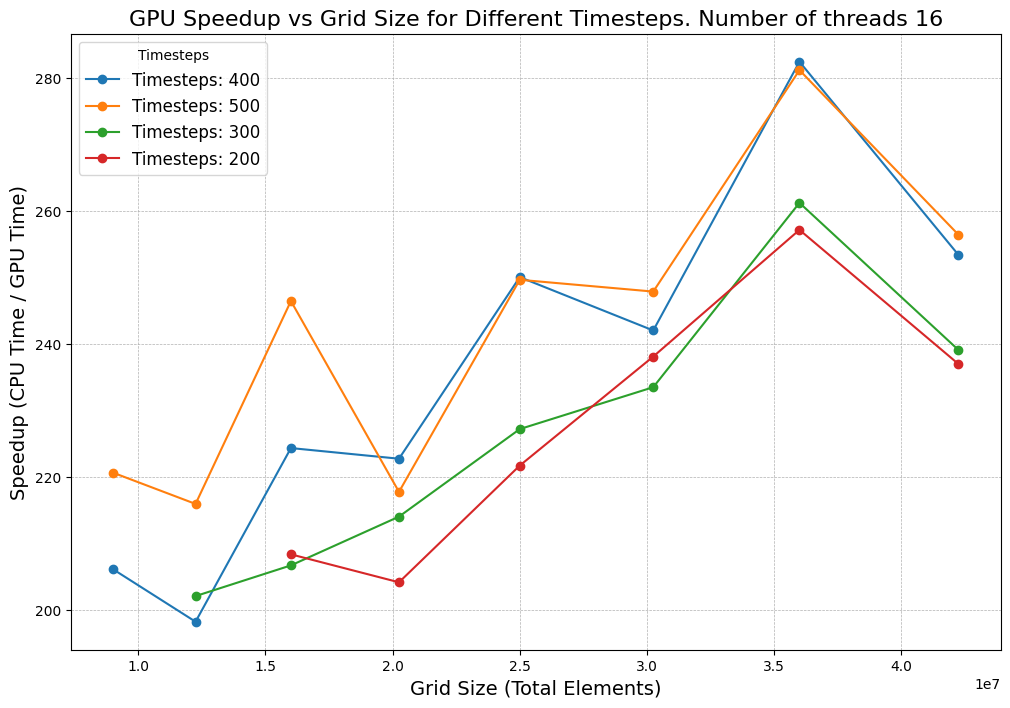

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("results.csv", names=["GridX", "GridY", "Timesteps", "Threads", "CPU Time", "GPU Time", "Speedup"])
df = df.sort_values(by=["GridX", "Timesteps"])
df = df[df["Threads"] == 16]
df["Grid Size"] = df["GridX"] * df["GridY"]

plt.figure(figsize=(12, 8))
unique_timesteps = df["Timesteps"].unique()
colors = plt.cm.viridis_r(range(len(unique_timesteps)))

for idx, timestep in enumerate(unique_timesteps):
    timestep_data = df[df["Timesteps"] == timestep]
    plt.plot(
        timestep_data["Grid Size"],
        timestep_data["Speedup"],
        marker='o',
        label=f"Timesteps: {timestep}"
    )

plt.xlabel("Grid Size (Total Elements)", fontsize=14)
plt.ylabel("Speedup (CPU Time / GPU Time)", fontsize=14)
plt.title("GPU Speedup vs Grid Size for Different Timesteps. Number of threads 16", fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title="Timesteps", fontsize=12)
plt.show()